In [ ]:
pip install pingouin

In [ ]:
import numpy as np
import pandas as pd
# from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
df = pd.read_csv('results.csv')

In [ ]:
df.head()

,Participant ID,Trial Number,Response,Correctness,Start Timestamp,End Timestamp,Reaction Time,Sample Number,Sample Order,Sample Time,Comparison Time,Condition,Path,Foil
0,1,1,left,False,2023-07-28 11:39:29.687,2023-07-28 11:39:46.595,16.908,28,right,7000,14000,H,"[(0, 4), (0, 3), (1, 3), (1, 2), (0, 2), (0, 1...","[(0, 4), (0, 3), (1, 3), (1, 2), (0, 2), (0, 1..."
1,1,2,left,True,2023-07-28 11:39:44.111,2023-07-28 11:40:00.881,16.770,43,left,7000,14000,H,"[(1, 3), (2, 3), (2, 2), (3, 2), (3, 3), (4, 3...","[(1, 3), (2, 3), (2, 2), (3, 2), (4, 2), (4, 3..."
2,1,3,right,True,2023-07-28 11:40:18.902,2023-07-28 11:40:34.253,15.351,88,right,7000,14000,H,"[(3, 4), (4, 4), (4, 3), (3, 3), (3, 2), (2, 2...","[(3, 4), (4, 4), (4, 3), (4, 2), (3, 2), (2, 2..."
3,1,4,right,False,2023-07-28 11:40:12.268,2023-07-28 11:40:28.986,16.718,24,left,7000,14000,H,"[(1, 4), (2, 4), (2, 3), (1, 3), (1, 2), (2, 2...","[(1, 4), (2, 4), (2, 3), (1, 3), (1, 2), (1, 1..."
4,1,5,left,False,2023-07-28 11:40:44.021,2023-07-28 11:40:48.886,4.865,31,right,7000,14000,H,"[(3, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4...","[(3, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4..."


In [ ]:
mapping = {False: 1, True: 0}
df = df.replace({'Correctness': mapping})

In [ ]:
df_rt = df.groupby(['Participant ID', 'Condition'])[['Reaction Time']].mean()
df_err = df.groupby(['Participant ID', 'Condition'])[['Correctness']].mean()

In [ ]:
df_err

Correctness
Participant ID Condition             
1              H             0.366667
               V             0.166667
               VH            0.066667
2              H             0.366667
               V             0.233333
               VH            0.200000
4              H             0.300000
               V             0.066667
               VH            0.033333
5              H             0.433333
               V             0.266667
               VH            0.133333
6              H             0.333333
               V             0.166667
               VH            0.133333
7              H             0.400000
               V             0.100000
               VH            0.033333
8              H             0.433333
               V             0.466667
               VH            0.333333
9              H             0.433333
               V             0.133333
               VH            0.100000
10             H             0.233333
               V             0.133333
               VH            0.066667
11             H             0.333333
               V             0.200000
               VH            0.233333
12             H             0.333333
               V             0.333333
               VH            0.300000
13             H             0.466667
               V             0.400000
               VH            0.233333
14             H             0.433333
               V             0.433333
               VH            0.333333
15             H             0.400000
               V             0.200000
               VH            0.133333
17             H             0.233333
               V             0.366667
               VH            0.300000
18             H             0.333333
               V             0.066667
               VH            0.133333
19             H             0.333333
               V             0.300000
               VH            0.300000
21             H             0.366667
               V             0.333333
               VH            0.233333
22             H             0.433333
               V             0.333333
               VH            0.400000
23             H             0.366667
               V             0.100000
               VH            0.133333

In [ ]:
df_rt = df_rt.reset_index()
df_rt.head()

,Participant ID,Condition,Reaction Time
0,1,H,10.196033
1,1,V,7.188600
2,1,VH,6.403433
3,2,H,12.049967
4,2,V,8.595000


<Axes: title={'center': 'Reaction Time'}, xlabel='Condition'>

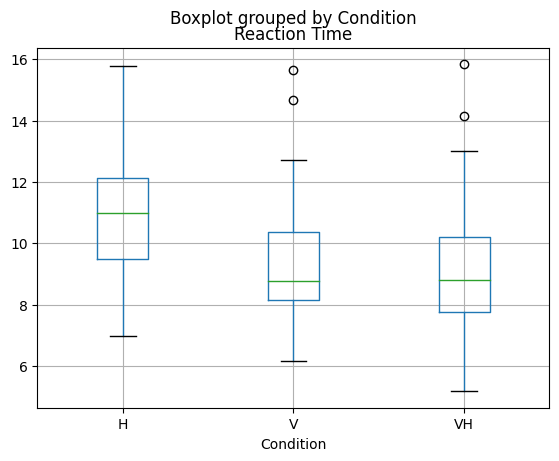

In [ ]:
df_rt.boxplot(column='Reaction Time', by='Condition')

In [ ]:
df_rt.groupby('Condition').std()

,Participant ID,Reaction Time
Condition,,
H,6.690724,2.172995
V,6.690724,2.576189
VH,6.690724,2.572644


In [ ]:
import pingouin as pg
pg.normality(df_rt, dv='Reaction Time', group='Condition', method='shapiro', alpha=0.05)

,W,pval,normal
Condition,,,
H,0.980132,0.935789,True
V,0.901656,0.044299,False
VH,0.923742,0.116975,True


In [ ]:
pg.friedman(data=df_rt, dv='Reaction Time', within='Condition', subject='Participant ID', method='chisq')

,Source,W,ddof1,Q,p-unc
Friedman,Condition,0.2725,2,10.9,0.004296


In [ ]:
pg.pairwise_tests(data=df_rt, dv='Reaction Time', between=None, within='Condition', subject='Participant ID', parametric=False, marginal=True, alpha=0.05, alternative='two-sided', padjust='bonf', effsize='cohen', correction='auto', nan_policy='listwise', return_desc=False, interaction=True, within_first=True)

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,cohen
0,Condition,H,V,True,False,31.0,two-sided,0.004221,0.012663,bonf,0.634631
1,Condition,H,VH,True,False,22.0,two-sided,0.001017,0.003050,bonf,0.683759
2,Condition,V,VH,True,False,92.0,two-sided,0.647655,1.000000,bonf,0.044969


<ipython-input-15-b298e1db9d89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x="Condition", y="Reaction Time", data=df_rt, palette="colorblind")


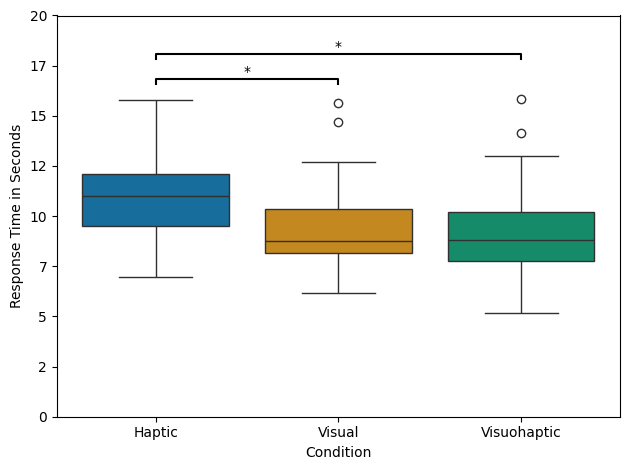

In [ ]:
g = sns.boxplot(x="Condition", y="Reaction Time", data=df_rt, palette="colorblind")

g.set_xticks([0, 1, 2])
g.set_xticklabels(['Haptic', 'Visual', 'Visuohaptic'])
g.set_ylabel('Response Time in Seconds')

# statistical annotation
x1, x2, x3 = 0, 1, 2
y, h, col = df_rt['Reaction Time'].max() + 2, 2, 'k'

plt.plot([x1, x1, x2, x2], [y-1.25, y-1, y-1, y-1.25], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1, "*", ha='center', va='bottom', color=col)

plt.plot([x1, x1, x3, x3], [y, y+0.25, y+0.25, y], lw=1.5, c=col)
plt.text((x1+x3)*.5, y+0.25, "*", ha='center', va='bottom', color=col)

plt.ylim(0, 19)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))

plt.tight_layout()
plt.savefig('tct.pdf', format='pdf')

plt.show()

In [ ]:
df_err = df_err.reset_index()
df_err.head()

,Participant ID,Condition,Correctness
0,1,H,0.366667
1,1,V,0.166667
2,1,VH,0.066667
3,2,H,0.366667
4,2,V,0.233333


<Axes: title={'center': 'Correctness'}, xlabel='Condition'>

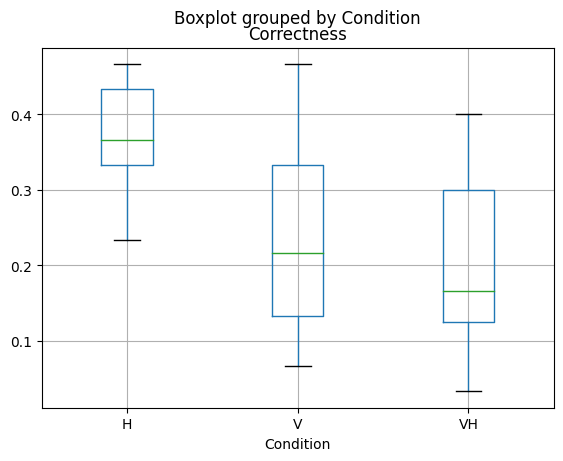

In [ ]:
df_err.boxplot(column='Correctness', by='Condition')

In [ ]:
df_err.groupby('Condition').std()

,Participant ID,Correctness
Condition,,
H,6.690724,0.064889
V,6.690724,0.125003
VH,6.690724,0.110223


In [ ]:
import pingouin as pg
pg.normality(df_err, dv='Correctness', group='Condition', method='shapiro', alpha=0.05)

,W,pval,normal
Condition,,,
H,0.921128,0.104166,True
V,0.945134,0.299184,True
VH,0.937954,0.219290,True


In [ ]:
pg.rm_anova(data=df_err, dv='Correctness', within='Condition', subject='Participant ID', correction='auto', detailed=False, effsize='ng2')

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Condition,2,38,30.589341,1.213221e-08,6.914725e-07,0.34963,0.733641,False,0.636935,0.017253


In [ ]:
pg.pairwise_tests(data=df_err, dv='Correctness', between=None, within='Condition', subject='Participant ID', parametric=True, marginal=True, alpha=0.05, alternative='two-sided', padjust='bonf', effsize='cohen', correction='auto', nan_policy='listwise', return_desc=False, interaction=True, within_first=True)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Condition,H,V,True,True,4.730588,19.0,two-sided,0.000146,0.000437,bonf,199.284,1.271884
1,Condition,H,VH,True,True,6.751859,19.0,two-sided,0.000002,0.000006,bonf,1.003e+04,1.934934
2,Condition,V,VH,True,True,3.309384,19.0,two-sided,0.003687,0.011060,bonf,11.883,0.410144


<ipython-input-22-58c1ebd90ef6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x="Condition", y="Correctness", data=df_err, palette="colorblind")


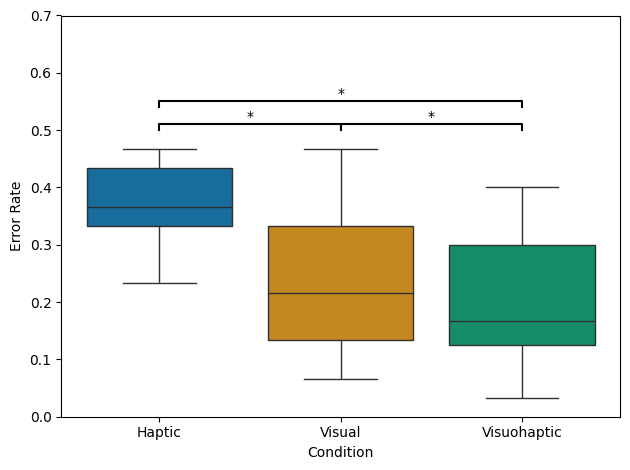

In [ ]:
g = sns.boxplot(x="Condition", y="Correctness", data=df_err, palette="colorblind")

g.set_xticks([0, 1, 2])
g.set_xticklabels(['Haptic', 'Visual', 'Visuohaptic'])
g.set_ylabel('Error Rate')

# statistical annotation
x1, x2, x3 = 0, 1, 2
y, h, col = df_err['Correctness'].max() + 1.25, 2, 'k'

plt.plot([x1, x1, x2, x2], [0.5, 0.51, 0.51, 0.5], lw=1.5, c=col)
plt.text((x1+x2)*.5, 0.51, "*", ha='center', va='bottom', color=col)

plt.plot([x2, x2, x3, x3], [0.5, 0.51, 0.51, 0.5], lw=1.5, c=col)
plt.text((x2+x3)*.5, 0.51, "*", ha='center', va='bottom', color=col)

plt.plot([x1, x1, x3, x3], [0.54, 0.55, 0.55, 0.54], lw=1.5, c=col)
plt.text((x1+x3)*.5, 0.55, "*", ha='center', va='bottom', color=col)

plt.ylim(0, 0.7)

plt.tight_layout()
plt.savefig('num_errors.pdf', format='pdf')

plt.show()